# Ruta del tablero en github

https://github.com/fabiandresleon1/analisis_datos/blob/master/exploracion_datos.ipynb


# Preparación del entorno 

Para usar este tablero de manera efectiva, es necesario instalar las librerías contenidas en el archivo `requirements.txt`. Esto se puede hacer ejecutando el siguiente comando:

```bash
pip install -r requirements.txt
```

Es importante tener en cuenta que Python debe estar instalado en el equipo.

### Visualización del árbol de decisión
Para poder visualizar el árbol de decisión, es necesario tener instalada la aplicación Graphviz y configurarla correctamente en el PATH de tu sistema. En la biografía encontrarás el enlace a los videos explicativos para guiarte en este proceso.

### Problemas con la librería ydata-profilling

Si encuentras problemas con la librería ydata-profilling, te recomendamos crear un entorno virtual en Python e instalar todas las dependencias desde el archivo requirements.txt antes de abrir el tablero. Los plugins instalados en Jupyter Notebook pueden causar inestabilidad con esta librería en algunos casos.



# Preparando datos

## Librerias 

Iniciamos el proceso importando **pandas** para convertir el archivo csv en un dataframe que pueda ser usado por python <br>
Importamos la libreria **chardet** para detectar en que encoding esta el archivo original ya que se detecto que no era un utf-8 y daba error al cargarlo en pandas con las tildes <br>

Leemos el archivo con el encoding encontrado y con el separador ";"




In [72]:
import pandas as pd
import chardet

# Detectar la codificación del archivo
with open('data.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding_detected = result['encoding']
    print(f'Codificación detectada: {encoding_detected}',)
    
    
df_origin = pd.read_csv('data.csv', encoding=encoding_detected, sep=';')




#, Servicio Internet, 

Codificación detectada: ISO-8859-1


In [73]:

df = df_origin[['Departamento ', 'Contrato', 'Factura_digital', 'Servicio_Internet','Soporte_tecnico','CopiaSeguridad_Online','Television_carta','Meses_alta','Abandono' ]]

df

Departamento         Contrato Factura_digital Servicio_Internet  \
0            Huila  Month-to-month             Yes               DSL   
1           Bogotá        One year              No               DSL   
2           Bogotá  Month-to-month             Yes               DSL   
3        Santander        One year              No               DSL   
4            Huila  Month-to-month             Yes       Fiber optic   
...            ...             ...             ...               ...   
7027        Boyacá        One year             Yes               DSL   
7028     Antioquia        One year             Yes       Fiber optic   
7029     Santander  Month-to-month             Yes               DSL   
7030         Huila  Month-to-month             Yes       Fiber optic   
7031         Huila        Two year             Yes       Fiber optic   

     Soporte_tecnico CopiaSeguridad_Online Television_carta  Meses_alta  \
0                 No                   Yes               No           1   
1                 No                    No               No          34   
2                 No                   Yes               No           2   
3                Yes                    No               No          45   
4                 No                    No               No           2   
...              ...                   ...              ...         ...   
7027             Yes                    No              Yes          24   
7028              No                   Yes              Yes          72   
7029              No                    No               No          11   
7030              No                    No               No           4   
7031             Yes                    No              Yes          66   

     Abandono  
0          No  
1          No  
2         Yes  
3          No  
4         Yes  
...       ...  
7027       No  
7028       No  
7029       No  
7030      Yes  
7031       No  

[7032 rows x 9 columns]

## Explorar los datos con DataWanger

Como tenemos la extensión DataWranger hacemos exploracion de los datos dejando el df y dandole en Abrir con Data Wranger<br>

se puede usar excel si no tienen la extensión

In [42]:
# revisamos la información del df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Departamento           7032 non-null   object
 1   Contrato               7032 non-null   object
 2   Factura_digital        7032 non-null   object
 3   Servicio_Internet      7032 non-null   object
 4   Soporte_tecnico        7032 non-null   object
 5   CopiaSeguridad_Online  7032 non-null   object
 6   Television_carta       7032 non-null   object
 7   Meses_alta             7032 non-null   int64 
 8   Abandono               7032 non-null   object
dtypes: int64(1), object(8)
memory usage: 494.6+ KB


#### Seleccionamos las columnas solicitadas en el ejercicio

## Realizamos una exploración basica de los datos

In [43]:
df.describe()

Meses_alta
count  7032.000000
mean     32.421786
std      24.545260
min       1.000000
25%       9.000000
50%      29.000000
75%      55.000000
max      72.000000

## Revisamos las primeras filas para ver que datos se tienen

In [44]:
df.head()

Departamento         Contrato Factura_digital Servicio_Internet  \
0         Huila  Month-to-month             Yes               DSL   
1        Bogotá        One year              No               DSL   
2        Bogotá  Month-to-month             Yes               DSL   
3     Santander        One year              No               DSL   
4         Huila  Month-to-month             Yes       Fiber optic   

  Soporte_tecnico CopiaSeguridad_Online Television_carta  Meses_alta Abandono  
0              No                   Yes               No           1       No  
1              No                    No               No          34       No  
2              No                   Yes               No           2      Yes  
3             Yes                    No               No          45       No  
4              No                    No               No           2      Yes

## Realizamos exploración de los gráficos con ydata-profilling para revisar tendencias, corelaciones y datos erroneos

En githunb no va a mostrar el reporte, pero lo puede consultar abriendo el archivo reporte.html

In [45]:
import ydata_profiling


# Exportar el reporte a HTML
ydata_profiling.ProfileReport(df).to_file("reporte.html")

#ver el report en Jupyter
ydata_profiling.ProfileReport(df)




c:\Users\FLEON\OneDrive - Universidad Nacional Abierta y a Distancia\Documents\Analisis de datos\.venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Limpieza de Datos

Generamos de nuevo el informe en ydata-profilling para revisar los datos a trabajar

Para el uso de las variables Categóricas en los modelos, se utiliza LabelEncoder para convertir las variables categóricas en valores numéricos. 

In [46]:
from sklearn import preprocessing # Asegúrate de importar preprocessing


#transformamo las variables que sean boolean a 0 o uno


#Factura_digital
df['Factura_digital'] = df['Factura_digital'].replace('Yes', 1)
df['Factura_digital'] = df['Factura_digital'].replace('No', 0)

#Abandono
df['Abandono'] = df['Abandono'].replace('Yes', 1)
df['Abandono'] = df['Abandono'].replace('No', 0)



# ahora le damos a las variables categoricas valores numericos para crear el arbol 

le = preprocessing.LabelEncoder()


columns = ['Departamento ', 
           'Servicio_Internet',
           'CopiaSeguridad_Online',
           'Soporte_tecnico',
           'Television_carta',
           'Contrato']

print([col for col in df.columns if col not in columns])

for column in columns:
    #Crear nueva columna con los valores transformados
    transformed_col = le.fit_transform(df[f"{column}"])
    df[f'{column}_cat'] = transformed_col
        
    #Eliminar la columna original
    df = df.drop(f'{column}', axis=1) 
    






['Factura_digital', 'Meses_alta', 'Abandono']


C:\Users\FLEON\AppData\Local\Temp\ipykernel_4472\2153227326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Factura_digital'] = df['Factura_digital'].replace('Yes', 1)
C:\Users\FLEON\AppData\Local\Temp\ipykernel_4472\2153227326.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Factura_digital'] = df['Factura_digital'].replace('No', 0)
C:\Users\FLEON\AppData\Local\Temp\ipykernel_4472\2153227326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [47]:
df.head()

Factura_digital  Meses_alta  Abandono  Departamento _cat  \
0                1           1         0                  6   
1                0          34         0                  3   
2                1           2         1                  3   
3                0          45         0                  7   
4                1           2         1                  6   

   Servicio_Internet_cat  CopiaSeguridad_Online_cat  Soporte_tecnico_cat  \
0                      0                          2                    0   
1                      0                          0                    0   
2                      0                          2                    0   
3                      0                          0                    2   
4                      1                          0                    0   

   Television_carta_cat  Contrato_cat  
0                     0             0  
1                     0             1  
2                     0             0  
3                     0             1  
4                     0             0

Normalizamos las variables continuas en un conjunto de datos  para ajustar la escala de los datos. Esto es importante por varias razones, especialmente cuando se trabaja con algoritmos sensibles a la magnitud de los valores

In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
# Normalizar las variables continuas. 
 
continuous = ['Meses_alta']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))
    


In [49]:
df.head()

Factura_digital  Meses_alta  Abandono  Departamento _cat  \
0                1   -1.280248         0                  6   
1                0    0.064303         0                  3   
2                1   -1.239504         1                  3   
3                0    0.512486         0                  7   
4                1   -1.239504         1                  6   

   Servicio_Internet_cat  CopiaSeguridad_Online_cat  Soporte_tecnico_cat  \
0                      0                          2                    0   
1                      0                          0                    0   
2                      0                          2                    0   
3                      0                          0                    2   
4                      1                          0                    0   

   Television_carta_cat  Contrato_cat  
0                     0             0  
1                     0             1  
2                     0             0  
3                     0             1  
4                     0             0

In [50]:
# Verificamos  los datos estén limpios/verifique si son nulos 
df[df.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Factura_digital, Meses_alta, Abandono, Departamento _cat, Servicio_Internet_cat, CopiaSeguridad_Online_cat, Soporte_tecnico_cat, Television_carta_cat, Contrato_cat]
Index: []

## Entrenamiento de prueba dividido

### Test Train Split

In [51]:
# Dividir entradas y salidas
#la columna 8 es donde nos dice que va a desistir

X = df.iloc[:, list(range(0, 8)) + list(range(9, len(df.columns)))]
Y = df.iloc[:, 8]



In [52]:
from sklearn.model_selection import train_test_split

# División de prueba/entrenamiento, dividimos 80, 20 tal y como lo solicita el ejercicio, en esta división creamos X_Test y X_train asi como Y_Test y Y_Train 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f'Los registros de X para entrenamiento son {X_train.shape[0]}')
print(f'Los registros de X para test son {X_test.shape[0]}')
print(f'Los registros de Y para entrenamiento son {y_train.shape[0]}')
print(f'Los registros de Y para test son {y_test.shape[0]}')

Los registros de X para entrenamiento son 5625
Los registros de X para test son 1407
Los registros de Y para entrenamiento son 5625
Los registros de Y para test son 1407


### Clasificador ingenuo de Bayes

P(A|B) = p(B|A). P(A)/
            P (B)




In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

#NB - All columns 
# #Initialize + fit model 

gnb = GaussianNB().fit(X_train, y_train)


#Predictions
y_pred = gnb.predict(X_test)

#Accuracy Score
NB_all_accuracy = accuracy_score(y_test,y_pred)

print('Naive Bayes Model Accuracy with all attributes: {0:.2f}'.format(NB_all_accuracy))

Naive Bayes Model Accuracy with all attributes: 0.71


## Con el árbol de Decisión

In [54]:
from sklearn.tree import DecisionTreeClassifier

#DT1 - All attributes
#Initalize + fit model

tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, random_state=5).fit(X_train, y_train)

#Predictions
y_pred = tree.predict(X_test)

#Accuracy Score
tree_all_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy with all attributes: {0:.2f}'.format(tree_all_accuracy))

X_train.count()

Decision Tree Accuracy with all attributes: 0.67


Factura_digital              5625
Meses_alta                   5625
Abandono                     5625
Departamento _cat            5625
Servicio_Internet_cat        5625
CopiaSeguridad_Online_cat    5625
Soporte_tecnico_cat          5625
Television_carta_cat         5625
dtype: int64

In [55]:
#Tree visualization function
def visualize_tree(tree_data, names):
    dot_data = StringIO() 
    export_graphviz(tree_data,out_file=dot_data, feature_names=names, filled=True,rounded=True, special_characters=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())    
    

## Nota Importante

Para visualizar correctamente el árbol de decisión, es necesario instalar Graphviz en tu equipo. Asegúrate de que durante la instalación se agregue automáticamente al PATH de todos los usuarios.

### Pasos para verificar la instalación:

1. Abrir el CMD (símbolo del sistema).
2. Escribe el siguiente comando y presiona Enter:

    dot -v

    Si el sistema responde con un mensaje que indica que no encontró el programa dot, significa que Graphviz no fue agregado al PATH correctamente.
3. En este caso, deberás agregar Graphviz al PATH manualmente, reiniciar el CMD y volver a intentarlo.

### Importante:

. Cada vez que modifiques el PATH, es necesario cerrar y volver a abrir el CMD para que los cambios tomen efecto.
. Si usas Visual Studio Code o Jupyter Notebook, también necesitarás reiniciarlos después de hacer cambios en el PATH para que se actualicen correctamente.





dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.277006 to fit



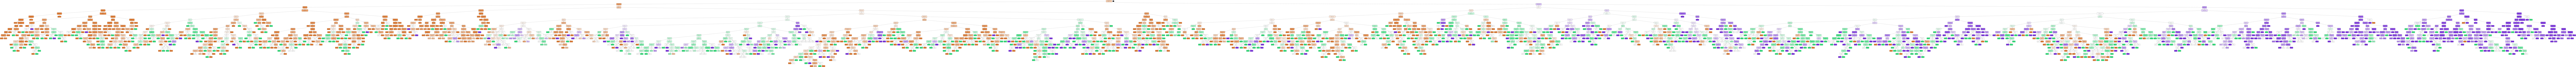

In [56]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from PIL import Image
from IPython.display import Image

#DT1 Graph
names = [
    'Meses_alta', 
    'Factura_digital',  'Departamento _cat',
    'Servicio_Internet_cat',
    'CopiaSeguridad_Online_cat', 'Soporte_tecnico_cat', 'Television_carta_cat',
    'Contrato_cat'
]

visualize_tree(tree,names)


### Consulte el árbol en el archivo arbol_1.png

Mostrar la importancia de las características (features) en el modelo de árbol de decisión (DecisionTreeClassifier). La importancia de las características indica qué tan relevante es cada una de las variables de entrada para la predicción que hace el modelo.

In [57]:
importances = tree.feature_importances_

# Crear un DataFrame con los nombres y las importancias
df_importance = pd.DataFrame({
    'Feature': names,
    'Importance': importances
})

# Ordenar por la importancia de mayor a menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(df_importance)



                     Feature  Importance
1            Factura_digital    0.537302
3      Servicio_Internet_cat    0.166022
6       Television_carta_cat    0.115886
0                 Meses_alta    0.042451
5        Soporte_tecnico_cat    0.041827
4  CopiaSeguridad_Online_cat    0.034192
2          Departamento _cat    0.031736
7               Contrato_cat    0.030584


# Análisis de la Importancia de las Variables

En el análisis de la importancia de las variables realizado con la librería utilizada, se identificaron como variables más relevantes las siguientes:

- **Factura digital**
- **Servicio de Internet**
- **Copia de seguridad**

Esto sugiere que los **servicios adicionales** podrían ser los principales factores que causan el abandono de los clientes, probablemente debido a su costo más alto.

In [58]:
high_importance = ['Factura_digital','Servicio_Internet_cat','CopiaSeguridad_Online_cat']
X_train2 = X_train[high_importance]
X_test2 = X_test[high_importance]

In [59]:
#DT2 - Top 3 features only
#Initialize + fit model
tree2 = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, random_state=5).fit(X_train2, y_train)

#Predictions
y_pred2 = tree2.predict(X_test2)

#Accuracy Score
tree_imp_accuracy = accuracy_score(y_test, y_pred2)

print('Decision Tree Accuracy with high importance attributes: {0:.2f}'.format(tree_imp_accuracy))


Decision Tree Accuracy with high importance attributes: 0.59


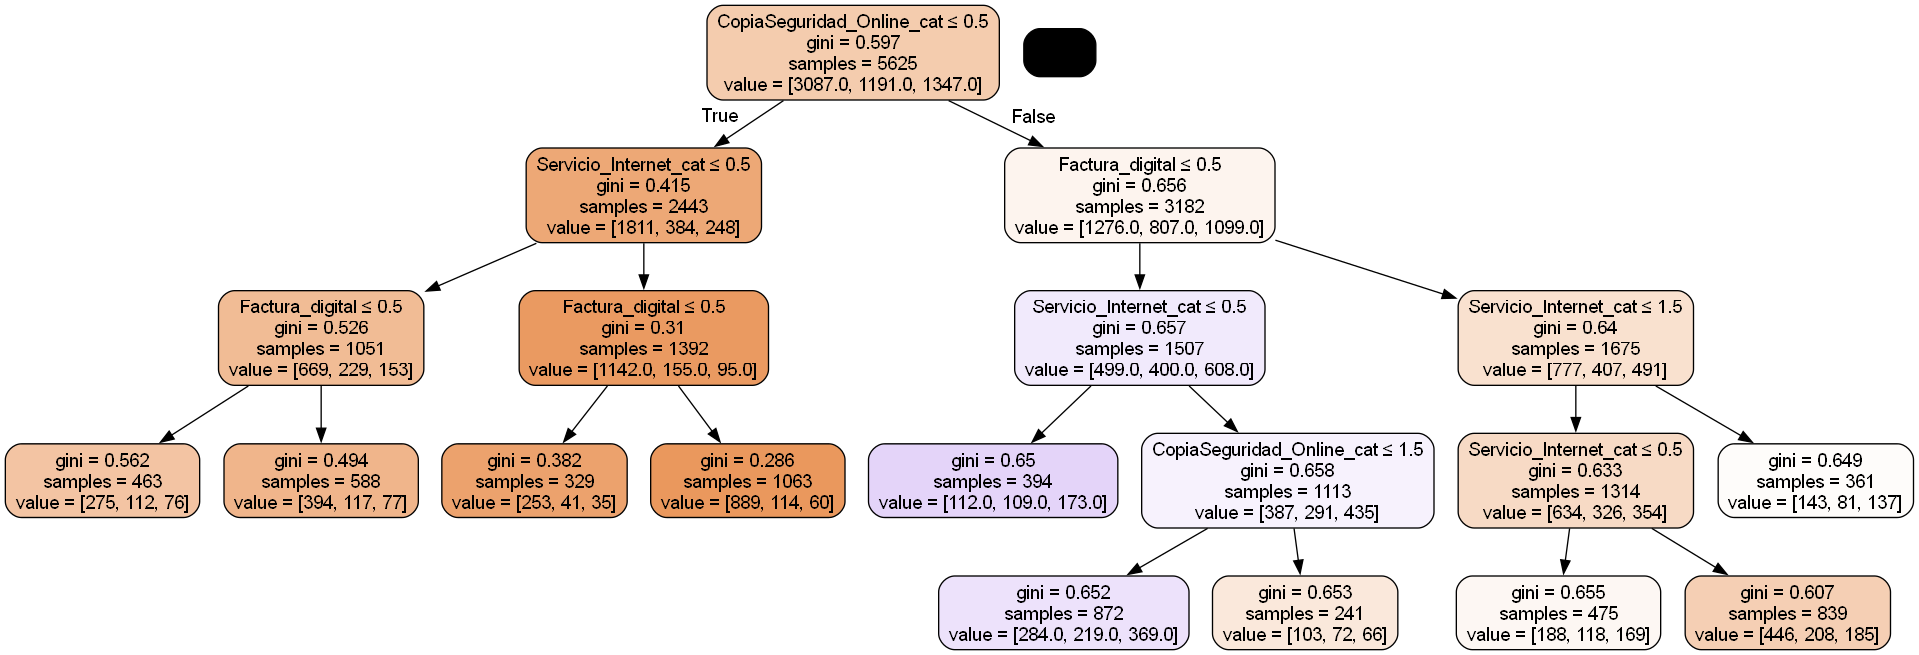

In [60]:
#DT2 Graph
visualize_tree(tree2,high_importance)

## Random Forest

Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje automático utilizado para tareas de clasificación y regresión. Se basa en la combinación de varios árboles de decisión para hacer predicciones más precisas y robustas.

### ¿Cómo funciona Random Forest?

- Creación de múltiples árboles de decisión: Random Forest genera varios árboles de decisión de manera independiente. Cada árbol se construye utilizando una muestra aleatoria de los datos (con reemplazo, es decir, una técnica llamada "bootstrap").

- Selección aleatoria de atributos: En cada división de un árbol de decisión, se selecciona un subconjunto aleatorio de las características (atributos) para hacer la mejor división. Esto introduce variabilidad entre los árboles y evita que todos los árboles sean muy similares.

- Votación o Promedio: Para clasificación, cada árbol da una "votación" sobre la clase a la que pertenece la instancia. La clase final se determina por votación mayoritaria (la clase que recibe más votos de los árboles).
Para regresión, se calcula el promedio de las predicciones de todos los árboles.

In [61]:
from sklearn.ensemble import RandomForestClassifier

#RF1 - All attributes
#Initalize + fit model

clf = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train, y_train)


#Predictions
RF_all_accuracy = accuracy_score(y_test,y_pred)


print('Random Forest Accuracy with all attributes: {0:.2f}'.format(RF_all_accuracy))

Random Forest Accuracy with all attributes: 0.67


In [62]:

importances = clf.feature_importances_

# Crear un DataFrame con los nombres y las importancias
df_importance = pd.DataFrame({
    'Feature': names,
    'Importance': importances
})

# Ordenar por la importancia de mayor a menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(df_importance)



                     Feature  Importance
1            Factura_digital    0.598996
3      Servicio_Internet_cat    0.126706
6       Television_carta_cat    0.084709
2          Departamento _cat    0.063473
7               Contrato_cat    0.034854
5        Soporte_tecnico_cat    0.034782
4  CopiaSeguridad_Online_cat    0.031953
0                 Meses_alta    0.024527


## Importancia en random forest

En este modelo encontramos que la relevancia esta en Factura_digial, Servicio_Internet_cat, Television_carta_cat y Departamento _cat

In [63]:
X_train

Factura_digital  Meses_alta  Abandono  Departamento _cat  \
6021                1    0.430998         1                  3   
3404                0   -1.198760         1                  2   
5474                1    0.919926         1                  2   
5515                0    0.512486         0                  7   
6328                0    0.919926         0                  6   
...               ...         ...       ...                ...   
3772                0   -1.198760         0                  4   
5191                1    0.756950         0                  8   
5226                1   -0.954296         0                  3   
5390                0    0.716206         0                  0   
860                 1   -0.506113         1                  3   

      Servicio_Internet_cat  CopiaSeguridad_Online_cat  Soporte_tecnico_cat  \
6021                      0                          0                    0   
3404                      0                          0                    0   
5474                      1                          0                    0   
5515                      0                          0                    2   
6328                      1                          0                    0   
...                     ...                        ...                  ...   
3772                      0                          0                    0   
5191                      1                          2                    2   
5226                      1                          0                    0   
5390                      2                          1                    1   
860                       1                          2                    0   

      Television_carta_cat  
6021                     2  
3404                     2  
5474                     0  
5515                     0  
6328                     2  
...                    ...  
3772                     0  
5191                     2  
5226                     0  
5390                     1  
860                      0  

[5625 rows x 8 columns]

In [64]:
#RF2 - Top 3 features only

# al revisar la importan

high_importance = ['Factura_digital', 'Servicio_Internet_cat', 'Television_carta_cat', 'Departamento _cat']
X_train2 = X_train[high_importance]
X_test2 = X_test[high_importance]

clf2 = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train2, y_train)

#Predictions
y_pred2 = clf2.predict(X_test2)

#Accuracy Score
RF_imp_accuracy = accuracy_score(y_test,y_pred2)
print('Random Forest Accuracy with high importance attributes: {0:.2f}'.format(RF_imp_accuracy))


Random Forest Accuracy with high importance attributes: 0.60


### Neural Network

In [65]:
from numpy.random import seed 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout

def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0): 
    # set random seed for reproducibility 
    seed(42) 
    model = Sequential() 
    # create first hidden layer 
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act)) 
    # create additional hidden layers 
    for i in range(1,len(lyrs)): 
        model.add(Dense(lyrs[i], activation=act)) 
    # add dropout, default is none 
    model.add(Dropout(dr)) 
    # create output layer 
    model.add(Dense(1, activation='sigmoid')) 
    # output layer 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
    return model

In [66]:
from numpy.random import seed 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout




#Initialize and create model
model = create_model()
print(model.summary())


c:\Users\FLEON\OneDrive - Universidad Nacional Abierta y a Distancia\Documents\Analisis de datos\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [67]:
#Train neural
import numpy as np

nn = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size=32, verbose=0)
nn_accuracy = np.mean(nn.history['val_accuracy'])


In [68]:
import matplotlib
import matplotlib.pyplot as plt


matplotlib.use('TkAgg') # Otra opción podría ser 'Qt5Agg' o 'GTK3Agg'


#Summarize history of accuracy
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()




## Comparamos los resultados para ver su precición

In [69]:
#All Accuracies


print('NB accuracy: {0:.2f}'.format(NB_all_accuracy))
print("Decision Tree:")
print('All attributes: {0:.2f}'.format(tree_all_accuracy))
print('High importance attributes: {0:.2f}'.format(tree_imp_accuracy))

print("Random Forest:")
print('All attributes: {0:.2f}'.format(RF_all_accuracy))
print('High importance attributes: {0:.2f}'.format(RF_imp_accuracy))

print("Neural Network: ")
print('All attributes: {0:.2f}'.format(nn_accuracy))




NB accuracy: 0.71
Decision Tree:
All attributes: 0.67
High importance attributes: 0.59
Random Forest:
All attributes: 0.67
High importance attributes: 0.60
Neural Network: 
All attributes: 0.52


In [70]:
import matplotlib.pyplot as plt

# Definir los métodos y sus tasas de precisión
methods = ['Naive Bayes', 'Decision Tree (All)', 'Decision Tree (High Importance)', 'Random Forest (All)','Random Forest (High Importance)', 'Neural Network (All)']
accuracies = [NB_all_accuracy, tree_all_accuracy, tree_imp_accuracy, RF_all_accuracy, RF_imp_accuracy, nn_accuracy]


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(methods, accuracies, color='skyblue')

plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.xlim(0.5, 0.85) # Establecer el límite del eje x para una mejor visualización
plt.show()



In [71]:
import pandas as pd

# Crear un DataFrame con los métodos y sus tasas de precisión

data = { 
            'Method': ['Naive Bayes', 
                       'Decision Tree (All)', 
                       'Decision Tree (High Importance)', 
                       'Random Forest (All)', 
                       'Random Forest (High Importance)', 
                       'Neural Network (All)']
            , 'Accuracy': [NB_all_accuracy, 
                           tree_all_accuracy, 
                           tree_imp_accuracy, 
                           RF_all_accuracy, 
                           RF_imp_accuracy, 
                           nn_accuracy] 
            }

df = pd.DataFrame(data)

# Imprimir la tabla
print(df)



                            Method  Accuracy
0                      Naive Bayes  0.705046
1              Decision Tree (All)  0.673774
2  Decision Tree (High Importance)  0.590618
3              Random Forest (All)  0.673774
4  Random Forest (High Importance)  0.595593
5             Neural Network (All)  0.523671


## CONCLUSIONES

De las tasas de precisión obtenidas para cada método de clasificación, podemos hacer varias observaciones y conclusiones:


+ Mejor método individual: En términos de precisión individual, el método de Naive Bayes utilizando todas las características obtiene la tasa de precisión más alta, con un valor de aproximadamente 0.71.

+ Variedad de métodos: Se utilizaron varios métodos de clasificación, incluyendo Naive Bayes, Árboles de Decisión y Bosques Aleatorios, junto con Redes Neuronales. Esto muestra una variedad de enfoques para el problema de clasificación.

+ Diferencias en precisión: Hay variaciones en las tasas de precisión entre los diferentes métodos, Pero el desempeño de los árboles de decisión con el random forest son muy similares, a diferencia con los otros dos modelos.

+ Importancia de las características: Se observa que en algunos casos, el uso de características de alta importancia (feature importance) no necesariamente mejora la precisión en comparación con el uso de todas las características disponibles. Esto se refleja en los resultados de Decision Tree, Pero en el metodo de Random Forest si muestra una mejora leve en la precición.


Perspectiva de optimización: Aunque Neural Naive Bayes con todas las características obtiene la tasa de precisión más alta, es importante considerar que es por la cantidad de variables, el ejercicio se corre con todas las variables de la tabla y la precisión es mucho más alta con las redes neuronales, lo que puede significar que con más variables los modelos de redes neuronales dan una mayor precisión, pero a un coste más alto de computo.


## Bibliografia

# Instalación de GraphViz
https://www.youtube.com/watch?v=JYAHwQ_tMG0
https://www.youtube.com/watch?v=u4npy_BUaYk

# Ejecicio titanic

https://www.youtube.com/watch?v=DA6ZAHBPF1U

https://github.com/claudiaregio/data-science
